In [47]:
import pickle as pkl
import os
import matplotlib.pyplot as plt
WINDOW_SIZE = 5
mode = 'a3c'

result = {
    'reward_vals' : [],
    'return_vals' : [],
    "mdd_vals" : [],
}

for (root,dirs,files) in os.walk("./models/B5C"):
    for f in files:
      oout = pkl.load(open(f"{root}/{f}", 'rb'))
      try:
        result['reward_vals'].append(oout['reward_vals'])
        result['return_vals'].append(oout['return_vals'])
        result['mdd_vals'].append(oout['mdd_vals'])
      except:
        pass

def plot_train(r):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
    ax1.set_title("mdd")
    plt.figure(figsize=(13,4))
    ax2.set_title("return_")
    ax3.set_title("reward")

    x = [i+1 for i in range(len(r['return_vals']))]
    # print(x, r['mdd_vals'], r['return_vals'], r['reward_vals'])
    ax1.plot(x, r['mdd_vals'])
    ax2.plot(x, r['return_vals'])
    ax3.plot(x, r['reward_vals'])
    
    fig.tight_layout()


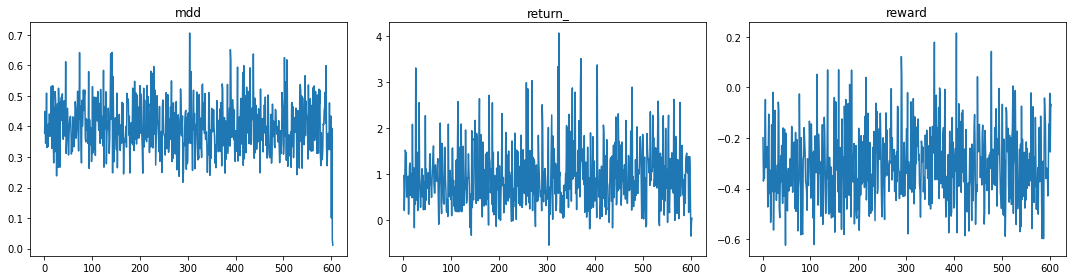

<Figure size 936x288 with 0 Axes>

In [48]:
plot_train(result)

In [49]:
# TEST
from plotly.subplots import make_subplots
import plotly.graph_objects as go
def plot_fig(df_, title, custom_range=[0,1]):
  df = df_.head(len(df_) - WINDOW_SIZE - 1)
  # Price line
  fig = make_subplots(rows=3, cols=1, 
                      specs = [[{"secondary_y": False}], 
                              [{"secondary_y": False}],
                              [{"secondary_y": False}]])
  fig.update_layout(
      autosize=False,
      width=1300,
      height=800,
      title_text=title,
    )

  initial_btc_price = float(df.head(1)['close'])
  fig.append_trace(
      go.Scatter(
          x=df.index,
          y=df['close'] / initial_btc_price,
          # line=dict(color='#ff9900', width=1),
          name='BTC/benchmark',
          # showlegend=False,
          legendgroup='1',
          marker=dict(
          size=42,
          # I want the color to be green if 
          # lower_limit ≤ y ≤ upper_limit
          # else red
          color='black',
        )
      ), row=1, col=1
  )

  # Sortino
  fig.add_trace(
      go.Scatter(
          x=df.index,
          y=df['sortino'],
          name='Sortino',
      ), row=2, col=1
  )

  # Portfolio
  fig.append_trace(
    go.Scatter(
          x=df.index,
          y=df[f'{mode}_return'] + 1,
          # line=dict(color='#ff9900', width=1),
          name='Portfolio',
          # showlegend=False,
          marker=dict(
          size=42,
          # I want the color to be green if 
          # lower_limit ≤ y ≤ upper_limit
          # else red
          color='red',
        )
      ), row=1, col=1
  )

  # MDD
  fig.add_trace(
    go.Scatter(
          x=df.index,
          y=-df['mdd'],
          # line=dict(color='#ff9900', width=1),
          name='MDD',
          # showlegend=False,
          marker=dict(
          size=42,
          # I want the color to be green if 
          # lower_limit ≤ y ≤ upper_limit
          # else red
          color='blue',
        )
      ), row=3, col=1
  )
  return fig
# 


In [50]:
data_addrs = ['hourly_bull.pkl', 'hourly_bear.pkl', 'minutely_crab.pkl', 'minutely_bull.pkl']

def plot_test(idx):
    results_ = pkl.load(open(f'./models/B5C/res-a3c-c{data_addrs[idx]}', 'rb'))
    f = plot_fig(results_['data'], results_['title'])
    return f

def get_delta(fig):
  benchmark = fig['data'][0]['y']
  portfolio = fig['data'][2]['y']
  delta = portfolio/benchmark
  ave_delta = delta.mean()
  return ave_delta - 1

def get_data_note(fig):
  portfolio = fig['data'][2]['y'][-1]
  mdd = fig['data'][3]['y'][-1]
  sortino = fig['data'][1]['y'][-1]
  return portfolio - 1, -mdd, sortino


In [51]:
f = plot_test(0)
print(get_delta(f), get_data_note(f))
f

0.02653737180157245 (0.21478874694293393, 0.08951208025073154, 0.7200471237664172)


In [52]:
f = plot_test(1)
print(get_delta(f), get_data_note(f))
f

0.4143493541407923 (-0.019574414631172488, 0.18722993456353565, -0.6413240590216956)


In [53]:
f = plot_test(2)
print(get_delta(f), get_data_note(f))
f

0.008392167756411828 (-0.0068147678715264615, 0.02969642355189306, -0.8357503147070326)


In [54]:
f = plot_test(3)
print(get_delta(f), get_data_note(f))
f

-0.005938220538444949 (0.0253911999510672, 0.014296739474112474, -0.34114276739569416)
